Import Libraries and Read files

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load all relevant GTFS files
agency = pd.read_csv('agency.txt')
calendar = pd.read_csv('calendar.txt')
routes = pd.read_csv('routes.txt')
stop_times = pd.read_csv('stop_times.txt')
stops = pd.read_csv('stops.txt')
trips = pd.read_csv('trips.txt')


Merge the dataframes then conersion of arrival time to hours

In [44]:
trip_stop_times = pd.merge(stop_times, trips, on="trip_id")
full_df = pd.merge(trip_stop_times, stops, on="stop_id")
full_df = pd.merge(full_df, routes, on="route_id")

# Convert arrival_time to hour
full_df['hour'] = pd.to_datetime(full_df['arrival_time'], errors='coerce').dt.hour

# Filter invalid hours (nulls, beyond 24h)
full_df = full_df[(full_df['hour'] >= 0) & (full_df['hour'] <= 23)]

full_df[['route_id', 'route_long_name', 'stop_name', 'arrival_time', 'hour']].head()

C:\Users\saura\AppData\Local\Temp\ipykernel_2692\1383874163.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_df['hour'] = pd.to_datetime(full_df['arrival_time'], errors='coerce').dt.hour


,route_id,route_long_name,stop_name,arrival_time,hour
0,0,RED_Rithala to Dilshad Garden,Rithala,05:28:08,5.0
1,0,RED_Rithala to Dilshad Garden,Rohini West,05:30:58,5.0
2,0,RED_Rithala to Dilshad Garden,Rohini East,05:33:28,5.0
3,0,RED_Rithala to Dilshad Garden,Pitampura,05:35:33,5.0
4,0,RED_Rithala to Dilshad Garden,Kohat Enclave,05:37:53,5.0


The Graph depicts Hourly Stop Visits

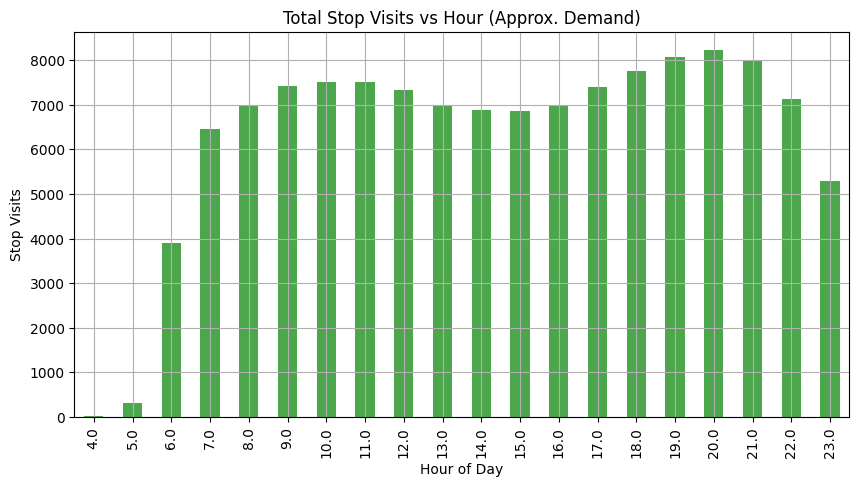

In [45]:
hourly_total = full_df.groupby('hour').size()
# Plot bar chart
plt.figure(figsize=(10,5))
hourly_total.plot(kind='bar', color='green', alpha=0.7)
plt.title("Total Stop Visits vs Hour (Approx. Demand)")
plt.xlabel("Hour of Day")
plt.ylabel("Stop Visits")
plt.grid(True)
plt.show()

Analysis of the busiest metro stations

Top 10 Busiest Routes (by peak hour stop demand):
route_long_name
BLUE_Dwarka Sector - 21 to Noida Electronic City    554
BLUE_Noida Electronic City to Dwarka Sector - 21    553
BLUE_Dwarka Sector - 21 to Vaishali                 455
YELLOW_Samaypur Badli to Huda City Centre           454
BLUE_Vaishali to Dwarka Sector - 21                 453
YELLOW_Huda City Centre to Samaypur Badli           451
PINK_Shiv Vihar to Majlis Park                      440
PINK_Majlis Park to Shiv Vihar                      440
VIOLET_Kashmere Gate to Raja Nahar Singh            302
VIOLET_Raja Nahar Singh to Kashmere Gate            301
dtype: int64


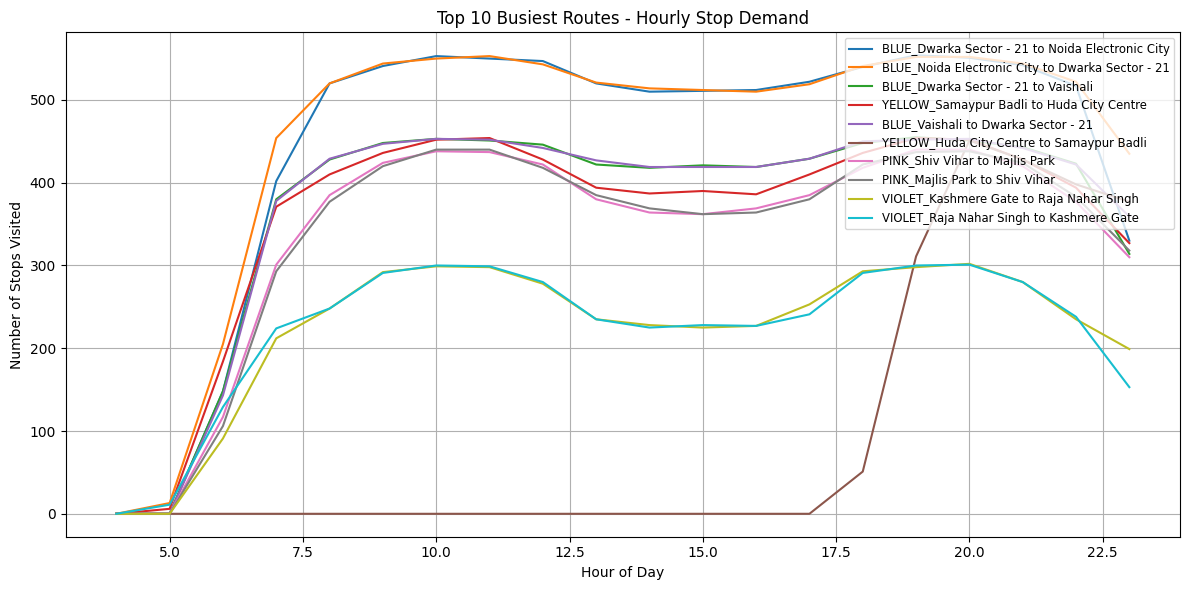

In [46]:
# Create a pivot table of stop visits per route per hour
route_hourly = full_df.groupby(['route_long_name', 'hour']).size().unstack(fill_value=0)

# Identify peak hour demand per route
peak_demand = route_hourly.max(axis=1).sort_values(ascending=False)

# Display top 10 busiest routes (by max hourly demand)
top_busy_routes = peak_demand.head(10)
print("Top 10 Busiest Routes (by peak hour stop demand):")
print(top_busy_routes)

top_routes_df = route_hourly.loc[top_busy_routes.index]

plt.figure(figsize=(12,6))
for route in top_routes_df.index:
    plt.plot(top_routes_df.columns, top_routes_df.loc[route], label=route)

plt.title("Top 10 Busiest Routes - Hourly Stop Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Stops Visited")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

High Value means high demand in that route
And max peak hours during 8-10 AM or 5-8 PM

In [47]:

overcrowded_threshold = 80    
underused_threshold = 10     

# Classify
overcrowded_routes = peak_demand[peak_demand >= overcrowded_threshold].index.tolist()
underutilized_routes = peak_demand[peak_demand <= underused_threshold].index.tolist()

print("\n To Increase Frequency (Overcrowded) suggested this:")
for route in overcrowded_routes:
    print(f"➤ {route}")

print("\n For Reduced Frequency (Underused):")
for route in underutilized_routes:
    print(f"➤ {route}")


 To Increase Frequency (Overcrowded) suggested this:
➤ BLUE_Dwarka Sector - 21 to Noida Electronic City
➤ BLUE_Noida Electronic City to Dwarka Sector - 21
➤ BLUE_Dwarka Sector - 21 to Vaishali
➤ YELLOW_Samaypur Badli to Huda City Centre
➤ BLUE_Vaishali to Dwarka Sector - 21
➤ YELLOW_Huda City Centre to Samaypur Badli
➤ PINK_Shiv Vihar to Majlis Park
➤ PINK_Majlis Park to Shiv Vihar
➤ VIOLET_Kashmere Gate to Raja Nahar Singh
➤ VIOLET_Raja Nahar Singh to Kashmere Gate
➤ MAGENTA_Botanical Garden to Janak Puri West
➤ MAGENTA_Janak Puri West to Botanical Garden
➤ YELLOW_Qutab Minar to Vishwavidyalaya
➤ YELLOW_Vishwavidyalaya to Qutab Minar
➤ RED_Rithala to Shaheed Sthal (New Bus Adda)
➤ RED_Shaheed Sthal (New Bus Adda) to Rithala
➤ YELLOW_Huda City Centre to Qutab Minar
➤ YELLOW_Qutab Minar  to Huda City Centre
➤ AQUA_Noida Sector 142 to Depot Station
➤ AQUA_Depot Station to Noida Sector 142
➤ VIOLET_Kashmere Gate to Badarpur Border
➤ RED_Dilshad Garden  to Rithala
➤ VIOLET_Badarpur Border

Analysing the routes having the most stops

Routes with Most Stops:
route_long_name
BLUE_Noida Electronic City to Dwarka Sector - 21    50
BLUE_Dwarka Sector - 21 to Noida Electronic City    50
BLUE_Vaishali to Dwarka Sector - 21                 41
BLUE_Dwarka Sector - 21 to Vaishali                 41
PINK_Shiv Vihar to Majlis Park                      38
PINK_Majlis Park to Shiv Vihar                      38
YELLOW_Huda City Centre to Samaypur Badli           37
YELLOW_Samaypur Badli to Huda City Centre           37
VIOLET_Raja Nahar Singh to Kashmere Gate            34
VIOLET_Kashmere Gate to Raja Nahar Singh            34
Name: stop_id, dtype: int64


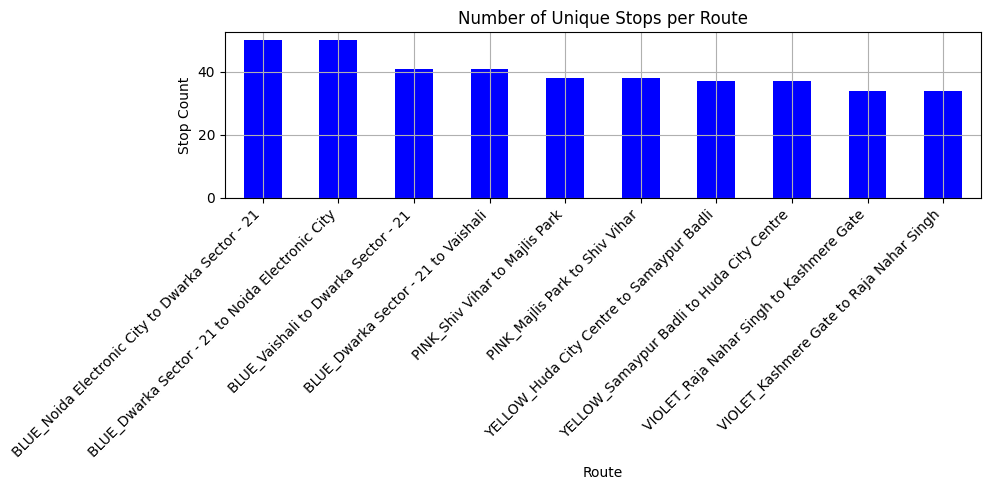

In [48]:
# Count unique stops per route
stops_per_route = full_df.groupby('route_long_name')['stop_id'].nunique().sort_values(ascending=False)

print("Routes with Most Stops:")
print(stops_per_route.head(10))

stops_per_route.head(10).plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Number of Unique Stops per Route")
plt.ylabel("Stop Count")
plt.xlabel("Route")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Service Analysis of Weekends vs Weekdays

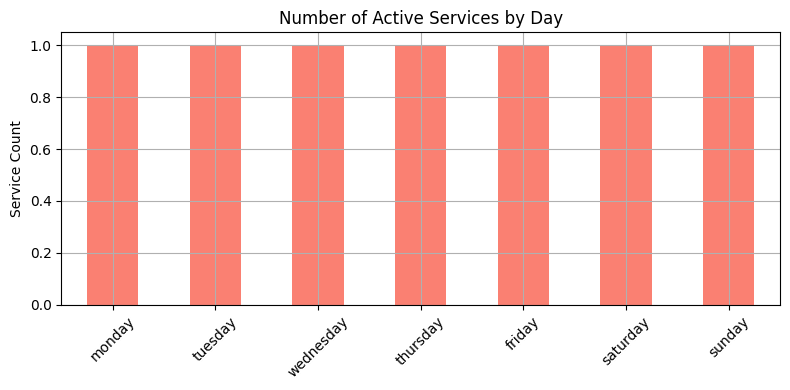

In [49]:

calendar.head()

# Count services by weekday/weekend
day_columns = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
calendar_sum = calendar[day_columns].sum().sort_values(ascending=False)

calendar_sum.plot(kind='bar', figsize=(8,4), color='salmon')
plt.title("Number of Active Services by Day")
plt.ylabel("Service Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Creating time block to see total stop visits per hour

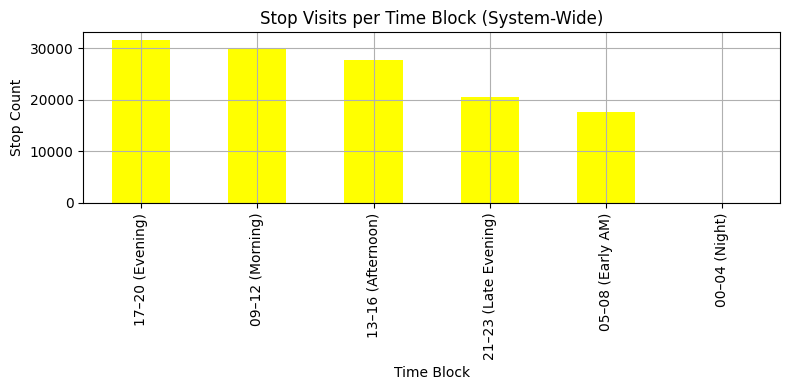

In [50]:

def time_block(hour):
    if 5 <= hour <= 8: return "05–08 (Early AM)"
    elif 9 <= hour <= 12: return "09–12 (Morning)"
    elif 13 <= hour <= 16: return "13–16 (Afternoon)"
    elif 17 <= hour <= 20: return "17–20 (Evening)"
    elif 21 <= hour <= 23: return "21–23 (Late Evening)"
    else: return "00–04 (Night)"

full_df['time_block'] = full_df['hour'].apply(time_block)

block_demand = full_df['time_block'].value_counts().sort_values(ascending=False)

# Plot
block_demand.plot(kind='bar', color='yellow', figsize=(8,4))
plt.title("Stop Visits per Time Block (System-Wide)")
plt.xlabel("Time Block")
plt.ylabel("Stop Count")
plt.grid(True)
plt.tight_layout()
plt.show()

Identifyong busiest stops

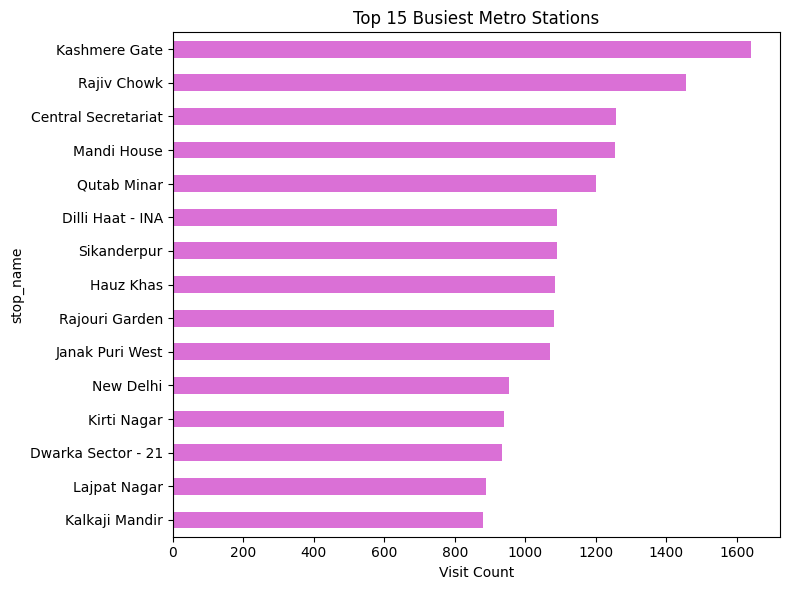

In [51]:
# Count stop visits
busiest_stops = full_df['stop_name'].value_counts().head(15)

# Plot
busiest_stops.plot(kind='barh', figsize=(8,6), color='orchid')
plt.title("Top 15 Busiest Metro Stations")
plt.xlabel("Visit Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Identifying the trips according to trip volume

Top 10 Routes by Trip Volume:
route_long_name
YELLOW_Qutab Minar to Vishwavidyalaya                        251
YELLOW_Qutab Minar  to Huda City Centre                      239
YELLOW_Vishwavidyalaya to Qutab Minar                        234
YELLOW_Huda City Centre to Qutab Minar                       234
AQUA_Noida Sector 142 to Depot Station                       224
AQUA_Depot Station to Noida Sector 142                       224
YELLOW_Samaypur Badli to Huda City Centre                    197
RAPID_Sector 55-56 (Rapid Metro) to Phase 3 (Rapid Metro)    196
BLUE_Noida Electronic City to Dwarka Sector - 21             186
BLUE_Vaishali to Dwarka Sector - 21                          184
Name: trip_id, dtype: int64


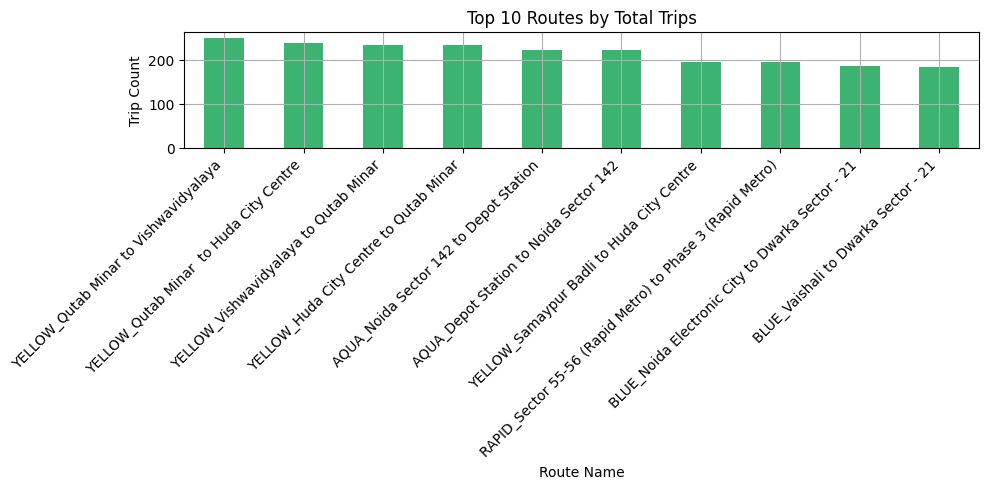

In [52]:

trips_per_route = full_df.groupby('route_long_name')['trip_id'].nunique().sort_values(ascending=False)

# Display top 10
print("Top 10 Routes by Trip Volume:")
print(trips_per_route.head(10))

# Plot
trips_per_route.head(10).plot(kind='bar', figsize=(10,5), color='mediumseagreen')
plt.title("Top 10 Routes by Total Trips")
plt.ylabel("Trip Count")
plt.xlabel("Route Name")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()